                                      Title                  Location  \
0    Private room in villa hosted by Calvin  Mumbai Maharashtra India   
1    Private room in villa hosted by Calvin  Mumbai Maharashtra India   
2             Room in hotel hosted by Dhruv  Mumbai Maharashtra India   
3  Private room in apartment hosted by Ayan  Mumbai Maharashtra India   
4     Entire rental unit hosted by Nidhisha  Mumbai Maharashtra India   

                                         Description  Price/night  \
0  Rustic private room surrounded by an urban forest       2100.0   
1  Nature lodge w/ balcony perfect for couples & ...       3750.0   
2  Smart Studio Apartment with private terrace Parle       1850.0   
3                ABC Bombay - The boutique home stay       1950.0   
4                       Spacious studio in Bandra W!       3290.0   

                                            Interior  \
0         1 guest 1 bedroom 1 bed 1 private bathroom   
1  2 guests 1 bedroom Lit path to 

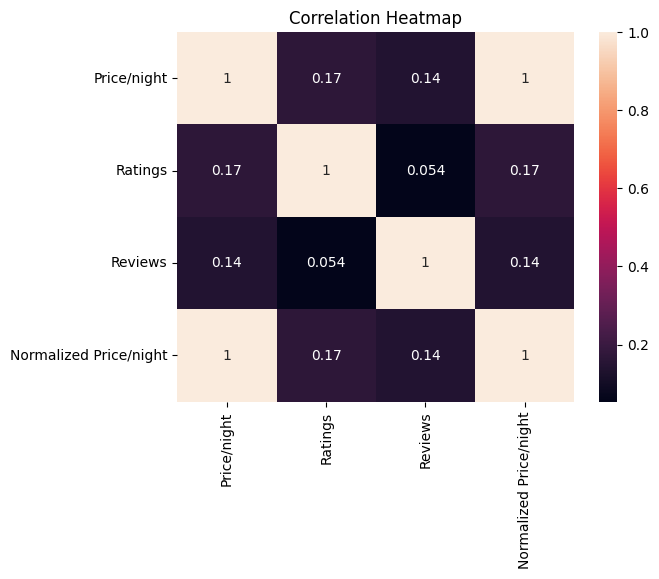

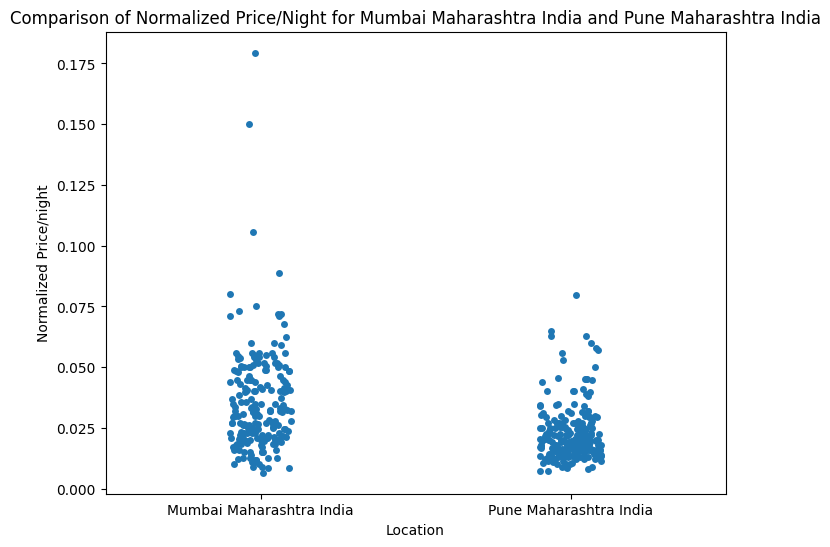

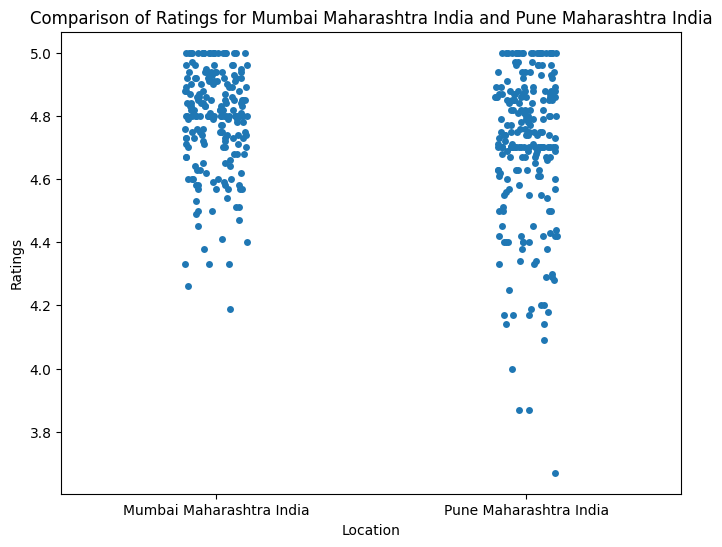

C:\Users\Soham\AppData\Local\Temp\ipykernel_13024\1054004663.py:118: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Location', y='Normalized Price/night', data=pd.concat([df_city1, df_city2]), ci='sd')


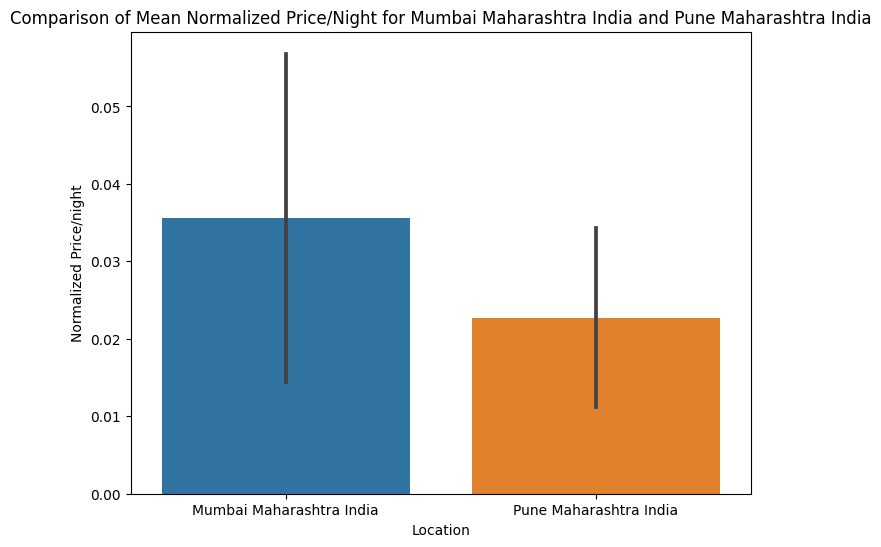

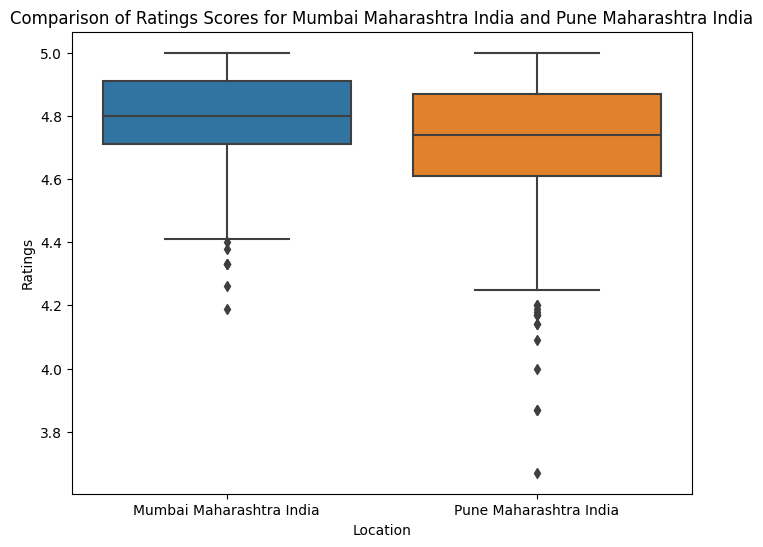

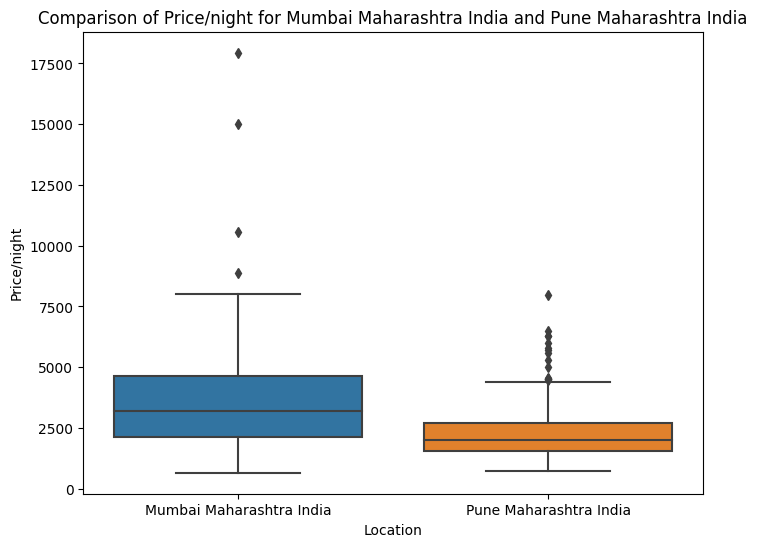

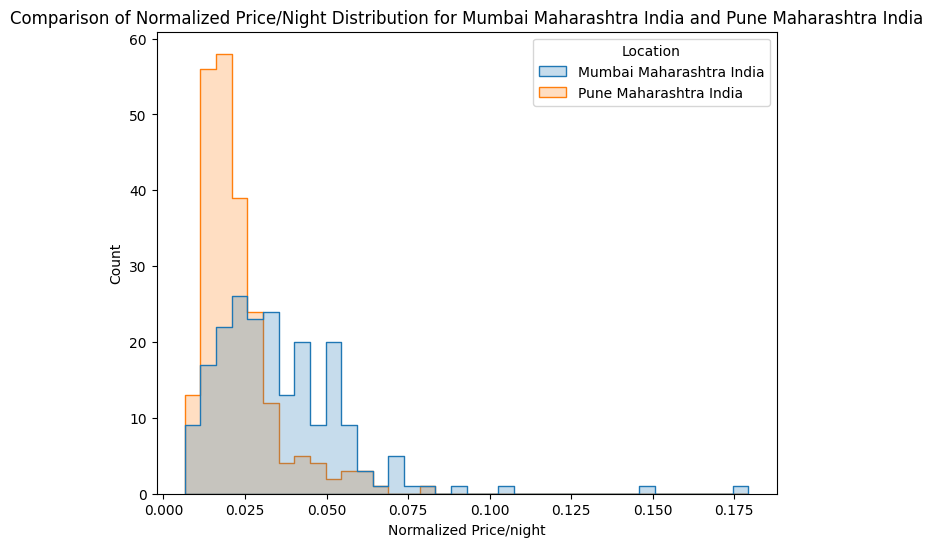

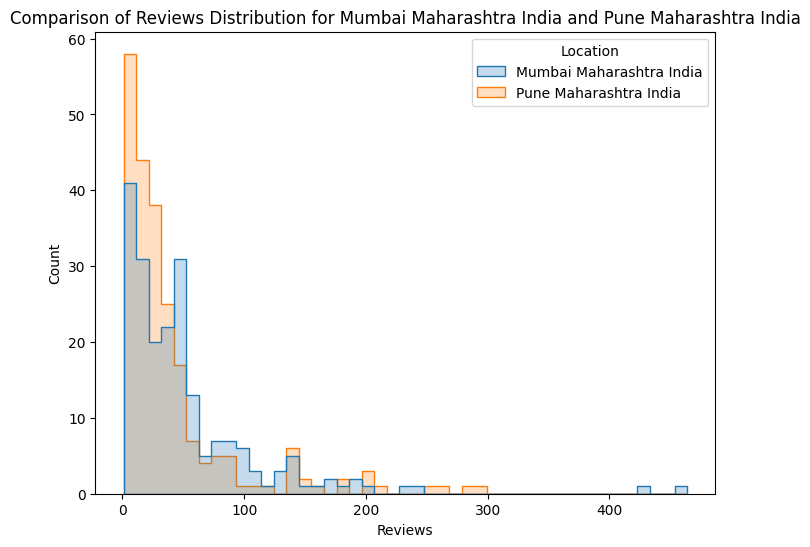

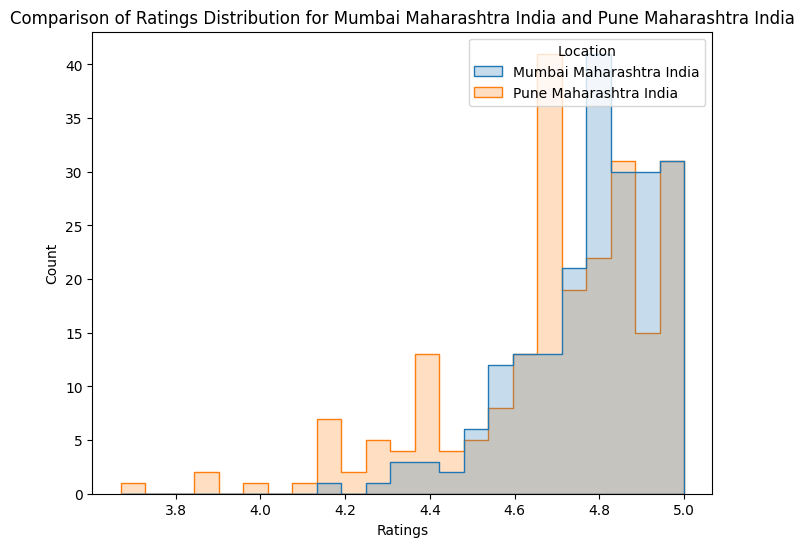

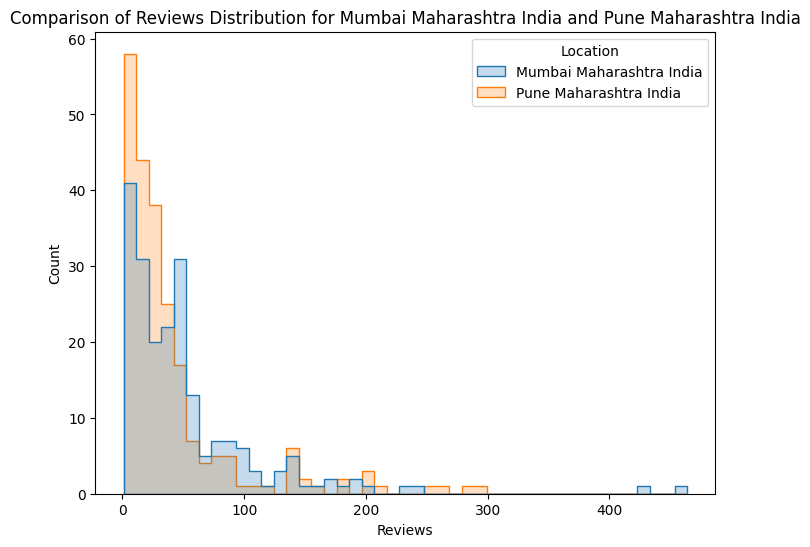

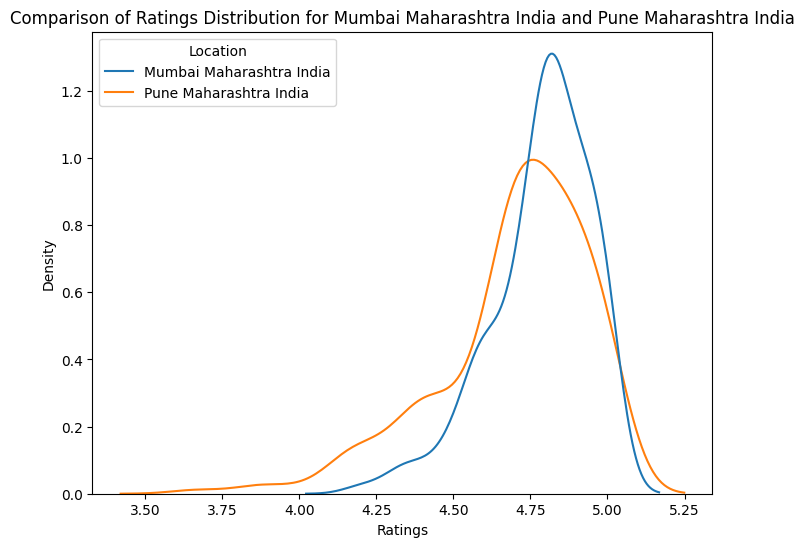

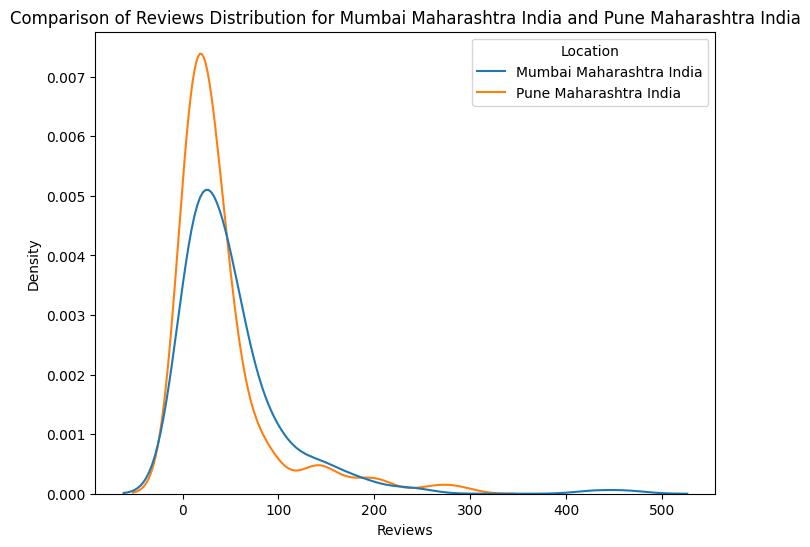

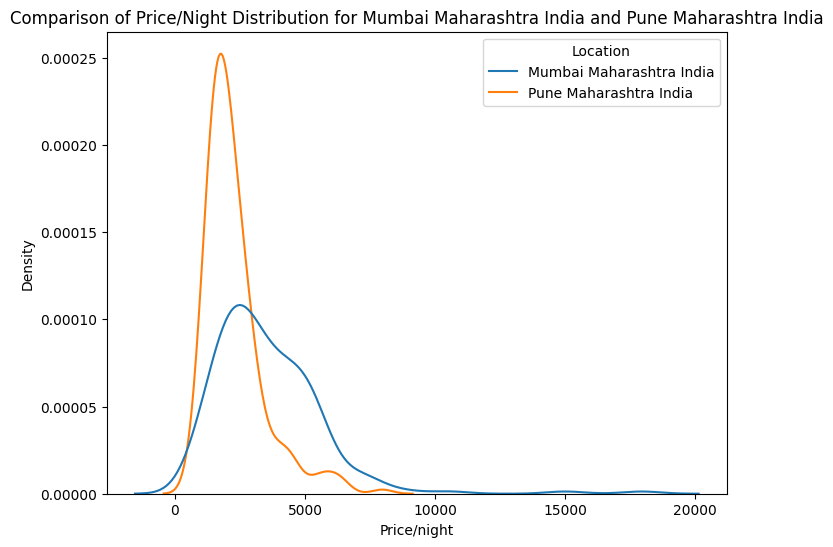

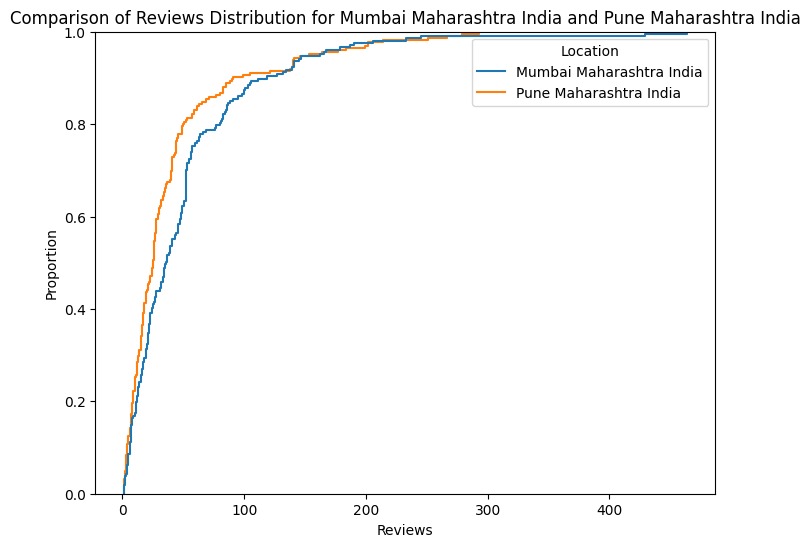

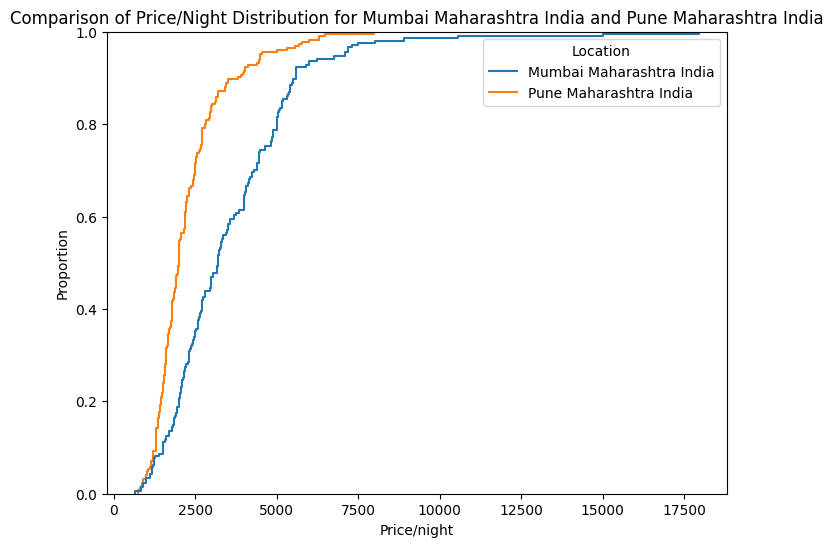

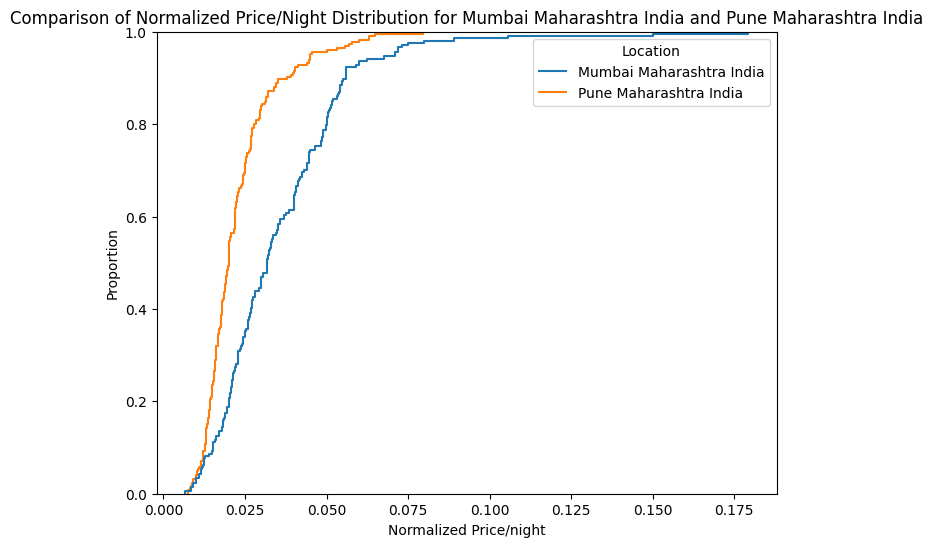

hello


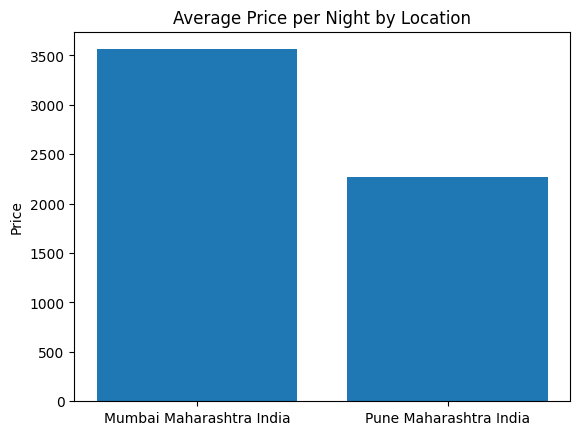

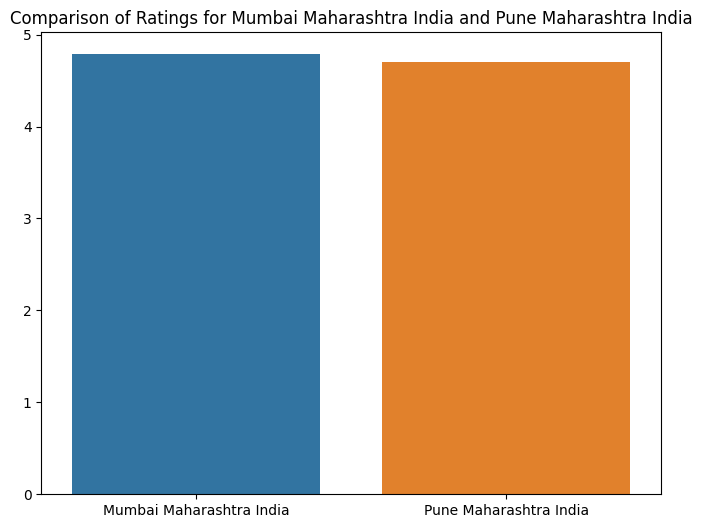

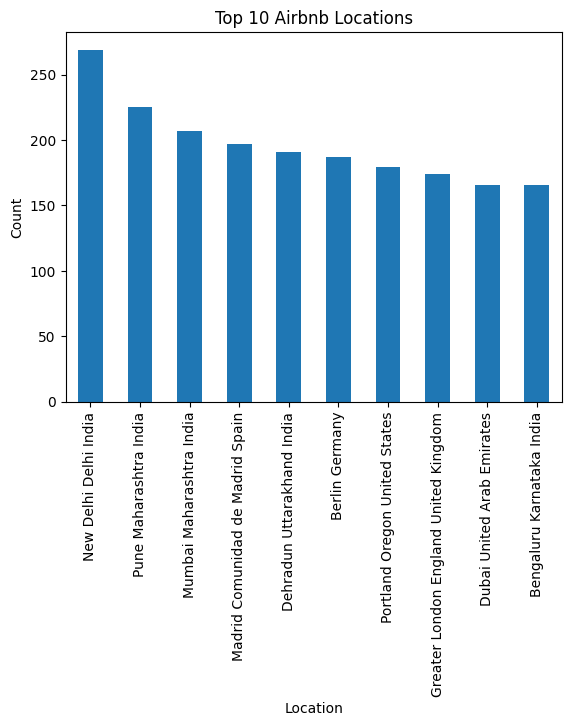

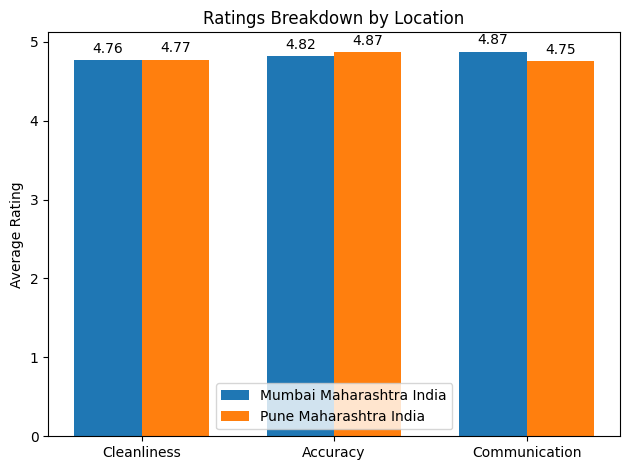

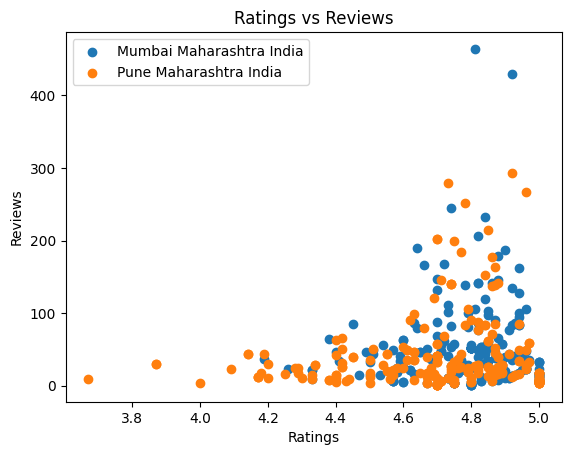

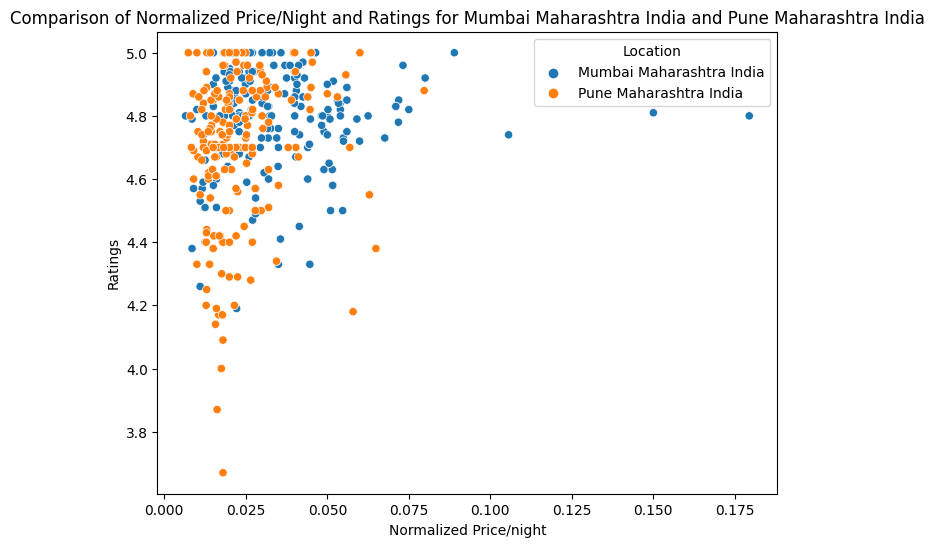

C:\Users\Soham\AppData\Local\Temp\ipykernel_13024\1054004663.py:306: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Reviews', y='Normalized Price/night', data=pd.concat([df_city1, df_city2]), palette='coolwarm')


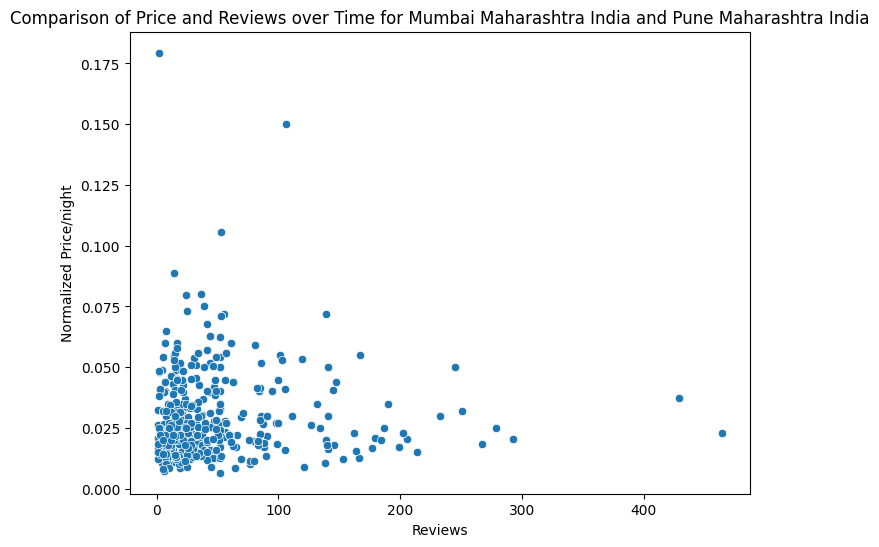

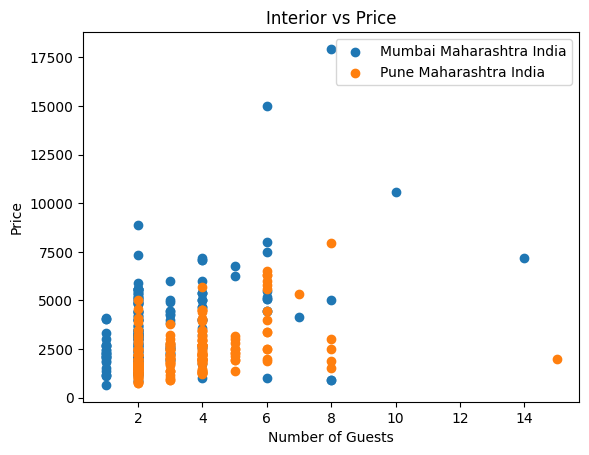

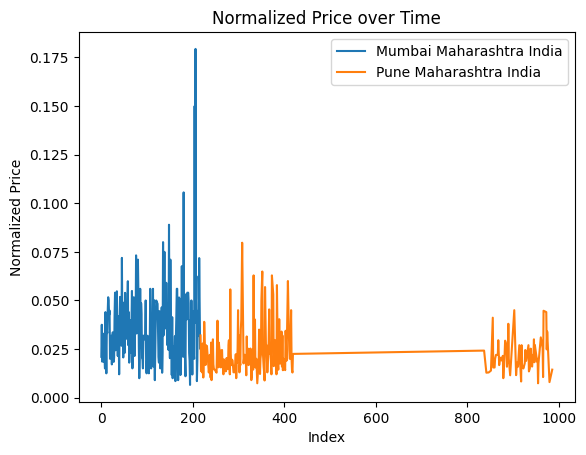

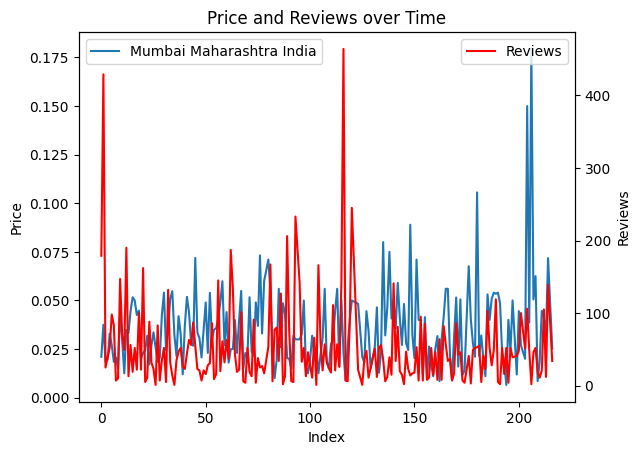

C:\Users\Soham\AppData\Local\Temp\ipykernel_13024\1054004663.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city1['Num Amenities'] = df_city1['Amenities'].apply(count_amenities)
C:\Users\Soham\AppData\Local\Temp\ipykernel_13024\1054004663.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city2['Num Amenities'] = df_city2['Amenities'].apply(count_amenities)


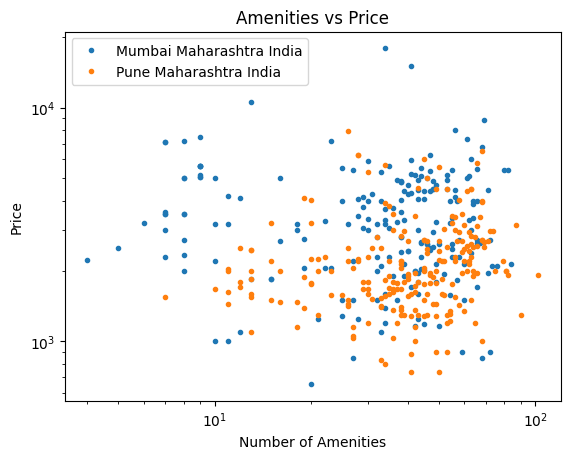

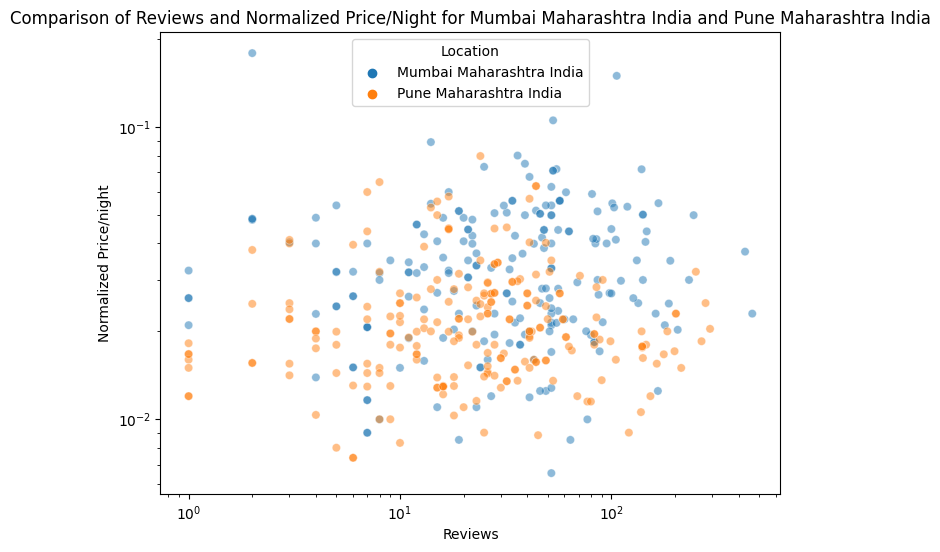

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the data from the CSV file
df = pd.read_csv('cleaned_filename.csv')

# Examination of data distribution
print(df.head())
# Check the shape of the dataset
print(df.shape)
# Check the data types of the columns
print(df.dtypes)
# Check the summary statistics of the numerical columns
print(df.describe())
# Check the missing values in the dataset
print(df.isnull().sum())

# Get user input for the two cities to compare
city1 = input("Enter the name of the first city to compare: ")
city2 = input("Enter the name of the second city to compare: ")

# Subset the data to only include listings from the two cities
df_city1 = df[df['Location'] == city1]
df_city2 = df[df['Location'] == city2]

# Encoding the categorical variables
title_encoder = OneHotEncoder()
title_encoder.fit(df[['Title']])
title_encoded = title_encoder.transform(df[['Title']]).toarray()

# Encode 'Location' column using OneHotEncoder
location_encoder = OneHotEncoder()
location_encoder.fit(df[['Location']])
location_encoded = location_encoder.transform(df[['Location']]).toarray()

# Encode 'Description' column using OneHotEncoder
description_encoder = OneHotEncoder()
description_encoder.fit(df[['Description']])
description_encoded = description_encoder.transform(df[['Description']]).toarray()

# Encode 'Interior' column using OneHotEncoder
interior_encoder = OneHotEncoder()
interior_encoder.fit(df[['Interior']])
interior_encoded = interior_encoder.transform(df[['Interior']]).toarray()

# Encode 'Amenities' column using OneHotEncoder
amenities_encoder = OneHotEncoder()
amenities_encoder.fit(df[['Amenities']])
amenities_encoded = amenities_encoder.transform(df[['Amenities']]).toarray()

# Encode 'Features' column using LabelEncoder
features_encoder = LabelEncoder()
features_encoder.fit(df['Features'])
features_encoded = features_encoder.transform(df['Features'])

# Combine all encoded columns
encoded_data = np.concatenate((title_encoded, location_encoded, description_encoded, interior_encoded, amenities_encoded, np.array([features_encoded]).T), axis=1)

# Normalizing and Scaling
df1 = pd.read_csv('cleaned_filename.csv')

# Normalize the 'Price/night' column using decimal scaling normalization
price_col = df1['Price/night']
max_price = price_col.max()
decimal_places = len(str(int(max_price)))
scaled_price_col = price_col / (10 ** decimal_places)
# df['Price/night'] = scaled_price_col
df1['Normalized Price/night'] = scaled_price_col

# Save the cleaned data to a new CSV file
df1.to_csv('example.csv', index=False)

# Handling missing values of the dataset (a most common issue with every dataset)
df2 = pd.read_csv('example.csv')

# Replace 'New' with the mean value of Ratings and Reviews for each Location
df2['Ratings'] = df2.groupby('Location')['Ratings'].apply(lambda x: x.replace('New', str(round(x[x != 'New'].astype(float).mean(), 1))))
df2['Reviews'] = df2.groupby('Location')['Reviews'].apply(lambda x: x.replace('New', str(round(x[x != 'New'].astype(float).mean(), 1))))

# Convert Ratings and Reviews to float
df2['Ratings'] = df2['Ratings'].astype(float)
df2['Reviews'] = df2['Reviews'].astype(float).round()

# Save the cleaned data to a new CSV file
df2.to_csv('example_new.csv', index=False)

# Normalize the 'Reviews' column using decimal scaling normalization
reviews_col = df1['Reviews']
max_reviews = reviews_col.max()
decimal_places = len(str(int(max_reviews)))
scaled_reviews_col = reviews_col / (10 ** (decimal_places - 1))
df1['Normalized Reviews'] = scaled_reviews_col

# Create a heatmap using Seaborn to visualize the correlation between the different columns of our data.
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Data Visualization with different types of charts for analyzing and presenting the data

# Plot 1: Dot plot of Normalized Price/night for the two cities
plt.figure(figsize=(8,6))
sns.stripplot(x='Location', y='Normalized Price/night', data=pd.concat([df_city1, df_city2]))
plt.title('Comparison of Normalized Price/Night for {} and {}'.format(city1, city2))
plt.show()

# Plot 2: Jitter plot of Ratings for the two cities
plt.figure(figsize=(8,6))
sns.stripplot(x='Location', y='Ratings', data=pd.concat([df_city1, df_city2]), jitter=True)
plt.title('Comparison of Ratings for {} and {}'.format(city1, city2))
plt.show()

# Plot 3: Error bar plot of Mean Normalized Price/night for the two cities
plt.figure(figsize=(8,6))
sns.barplot(x='Location', y='Normalized Price/night', data=pd.concat([df_city1, df_city2]), ci='sd')
plt.title('Comparison of Mean Normalized Price/Night for {} and {}'.format(city1, city2))
plt.show()

#  plotting the outliers in the data, if any, using a Boxplot.
# Plot 4: Box and whisker plot of Ratings scores for the two cities
plt.figure(figsize=(8,6))
sns.boxplot(x='Location', y='Ratings', data=pd.concat([df_city1, df_city2]))
plt.title('Comparison of Ratings Scores for {} and {}'.format(city1, city2))
plt.show()

# Plot 4.1: Box and whisker plot of Price/night for the two cities
plt.figure(figsize=(8,6))
sns.boxplot(x='Location', y='Price/night', data=pd.concat([df_city1, df_city2]))
plt.title('Comparison of Price/night for {} and {}'.format(city1, city2))
plt.show()

# Plot 5: Histogram of Normalized Price/night for the two cities
plt.figure(figsize=(8,6))
sns.histplot(data=pd.concat([df_city1, df_city2]), x='Normalized Price/night', hue='Location', element='step')
plt.title('Comparison of Normalized Price/Night Distribution for {} and {}'.format(city1, city2))
plt.show()

# Plot 6: Histogram of Reviews for the two cities
plt.figure(figsize=(8,6))
sns.histplot(data=pd.concat([df_city1, df_city2]), x='Reviews', hue='Location', element='step')
plt.title('Comparison of Reviews Distribution for {} and {}'.format(city1, city2))
plt.show()

# Plot 7: Histogram of Ratings for the two cities
plt.figure(figsize=(8,6))
sns.histplot(data=pd.concat([df_city1, df_city2]), x='Ratings', hue='Location', element='step')
plt.title('Comparison of Ratings Distribution for {} and {}'.format(city1, city2))
plt.show()

# Plot 8: Histogram of Reviews for the two cities
plt.figure(figsize=(8,6))
sns.histplot(data=pd.concat([df_city1, df_city2]), x='Reviews', hue='Location', element='step')
plt.title('Comparison of Reviews Distribution for {} and {}'.format(city1, city2))
plt.show()

# Plot 9: Kernel density estimate of Ratings for the two cities
plt.figure(figsize=(8,6))
sns.kdeplot(data=pd.concat([df_city1, df_city2]), x='Ratings', hue='Location')
plt.title('Comparison of Ratings Distribution for {} and {}'.format(city1, city2))
plt.show()

# Plot 10: Kernel density estimate of Reviews for the two cities
plt.figure(figsize=(8,6))
sns.kdeplot(data=pd.concat([df_city1, df_city2]), x='Reviews', hue='Location')
plt.title('Comparison of Reviews Distribution for {} and {}'.format(city1, city2))
plt.show()

# Plot 11: Kernel density estimate of Price/night for the two cities
plt.figure(figsize=(8,6))
sns.kdeplot(data=pd.concat([df_city1, df_city2]), x='Price/night', hue='Location')
plt.title('Comparison of Price/Night Distribution for {} and {}'.format(city1, city2))
plt.show()

# Plot 12: Cumulative distribution function of Reviews for the two cities
plt.figure(figsize=(8,6))
sns.ecdfplot(data=pd.concat([df_city1, df_city2]), x='Reviews', hue='Location')
plt.title('Comparison of Reviews Distribution for {} and {}'.format(city1, city2))
plt.show()

# Plot 13: Cumulative distribution function of Price/night for the two cities
plt.figure(figsize=(8,6))
sns.ecdfplot(data=pd.concat([df_city1, df_city2]), x='Price/night', hue='Location')
plt.title('Comparison of Price/Night Distribution for {} and {}'.format(city1, city2))
plt.show()

# Plot 14: Cumulative distribution function of Normalized Price/night for the two cities
plt.figure(figsize=(8,6))
sns.ecdfplot(data=pd.concat([df_city1, df_city2]), x='Normalized Price/night', hue='Location')
plt.title('Comparison of Normalized Price/Night Distribution for {} and {}'.format(city1, city2))
plt.show()

print("hello")

# Plot 1: Bar chart of average price by location
locations = [city1, city2]
prices = [df_city1['Price/night'].mean(), df_city2['Price/night'].mean()]
plt.bar(locations, prices)
plt.title('Average Price per Night by Location')
plt.ylabel('Price')
plt.show()

# Plot 2: Bar chart of Ratings for the two cities
plt.figure(figsize=(8,6))
df_city1_ratings = df_city1['Ratings'].mean()
df_city2_ratings = df_city2['Ratings'].mean()
sns.barplot(x=[city1, city2], y=[df_city1_ratings, df_city2_ratings])
plt.title('Comparison of Ratings for {} and {}'.format(city1, city2))
plt.show()

# Plot 3: Bar chart for Location
location_counts = df['Location'].value_counts().head(10)
location_counts.plot(kind='bar')
plt.title('Top 10 Airbnb Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

# Plot 4: Bar chart of the mean feature ratings for each location
rating_categories = ['Cleanliness', 'Accuracy', 'Communication', 'Location', 'Check-in', 'Value']
# Extract the ratings for each location
ratings1 = []
ratings2 = []
for feature in df['Features']:
    if feature == 'New':
        # Handle the case where the feature is 'New'
        ratings1.append([None for i in range(len(rating_categories)//2)])
        ratings2.append([None for i in range(len(rating_categories)//2)])
    else:
        # Split the feature string by space to extract ratings for each category
        feature_list = feature.split()
        ratings = []
        for i in range(len(rating_categories)):
            rating = None
            for j in range(len(feature_list)):
                if rating_categories[i] in feature_list[j]:
                    rating = float(feature_list[j][len(rating_categories[i]):])
                    break
            ratings.append(rating)
        if len(ratings) == len(rating_categories):
            # Append the ratings to the corresponding location
            ratings1.append(ratings[:len(rating_categories)//2])
            ratings2.append(ratings[len(rating_categories)//2:])
        else:
            # Handle the case where the feature string does not contain all categories
            ratings1.append([None for i in range(len(rating_categories)//2)])
            ratings2.append([None for i in range(len(rating_categories)//2)])

# Convert the ratings lists to dataframes
ratings1 = pd.DataFrame(ratings1, columns=rating_categories[:len(rating_categories)//2]).astype('float64')
ratings2 = pd.DataFrame(ratings2, columns=rating_categories[len(rating_categories)//2:]).astype('float64')

# Calculate the mean ratings for each location
mean_ratings1 = ratings1.mean()
mean_ratings2 = ratings2.mean()

# Create a bar chart of the mean ratings for each location
width = 0.35
x = np.arange(len(rating_categories)//2)

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_ratings1, width, label=city1)
rects2 = ax.bar(x + width/2, mean_ratings2, width, label=city2)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Rating')
ax.set_title('Ratings Breakdown by Location')
ax.set_xticks(x)
ax.set_xticklabels(rating_categories[:len(rating_categories)//2])
ax.legend()

# Add labels to the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height) if height is not None else 'N/A',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

# Plot 5: Scatter plot of ratings vs reviews
plt.scatter(df_city1['Ratings'], df_city1['Reviews'], label=city1)
plt.scatter(df_city2['Ratings'], df_city2['Reviews'], label=city2)
plt.title('Ratings vs Reviews')
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.legend()
plt.show()

# Plot 6: Scatter plot of Normalized Price/night and Ratings for the two cities
plt.figure(figsize=(8,6))
sns.scatterplot(x='Normalized Price/night', y='Ratings', hue='Location', data=pd.concat([df_city1, df_city2]))
plt.title('Comparison of Normalized Price/Night and Ratings for {} and {}'.format(city1, city2))
plt.show()

# Plot 7: Scatter plot of price and reviews over time
plt.figure(figsize=(8,6))
sns.scatterplot(x='Reviews', y='Normalized Price/night', data=pd.concat([df_city1, df_city2]), palette='coolwarm')
plt.title('Comparison of Price and Reviews over Time for {} and {}'.format(city1, city2))
plt.show()

# Plot 8: Scatter plot of interior vs price
plt.scatter(df_city1['Interior'].str.split().str[0].astype(int), df_city1['Price/night'], label=city1)
plt.scatter(df_city2['Interior'].str.split().str[0].astype(int), df_city2['Price/night'], label=city2)
plt.title('Interior vs Price')
plt.xlabel('Number of Guests')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot 9: Line plot of price over time
plt.plot(df_city1['Normalized Price/night'], label=city1)
plt.plot(df_city2['Normalized Price/night'], label=city2)
plt.title('Normalized Price over Time')
plt.xlabel('Index')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

# Plot 10: Line plot of price and reviews over time
fig, ax1 = plt.subplots()
ax1.plot(df_city1['Normalized Price/night'], label=city1)
ax2 = ax1.twinx()
ax2.plot(df_city1['Reviews'], 'r', label='Reviews')
ax1.set_xlabel('Index')
ax1.set_ylabel('Price')
ax2.set_ylabel('Reviews')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Price and Reviews over Time')
plt.show()

# Plot 11: Log-log plot of amenities vs price
def count_amenities(amenities):
    amenity_list = amenities.split("and")
    num_amenities = len(amenity_list[0].split())
    if len(amenity_list) > 1:
        try:
            num_amenities += int(amenity_list[1].split()[0])
        except ValueError:
            pass
    return num_amenities

df_city1['Num Amenities'] = df_city1['Amenities'].apply(count_amenities)
df_city2['Num Amenities'] = df_city2['Amenities'].apply(count_amenities)
plt.loglog(df_city1['Num Amenities'], df_city1['Price/night'], '.', label=city1)
plt.loglog(df_city2['Num Amenities'], df_city2['Price/night'], '.', label=city2)
plt.title('Amenities vs Price')
plt.xlabel('Number of Amenities')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot 12: Log-log plot of Reviews and Normalized Price/night for the two cities
plt.figure(figsize=(8,6))
sns.scatterplot(x='Reviews', y='Normalized Price/night', hue='Location', data=pd.concat([df_city1, df_city2]), alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Comparison of Reviews and Normalized Price/Night for {} and {}'.format(city1, city2))
plt.show()